In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("C:/Users/rajs1/train.csv")

In [8]:
data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [9]:
data.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

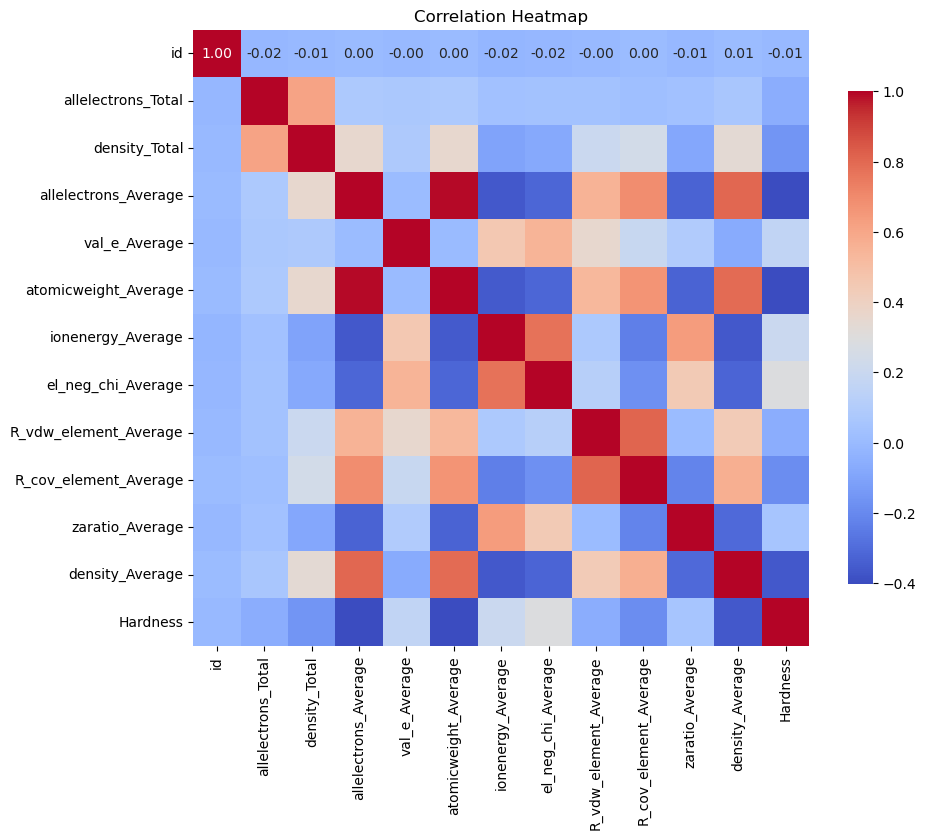

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

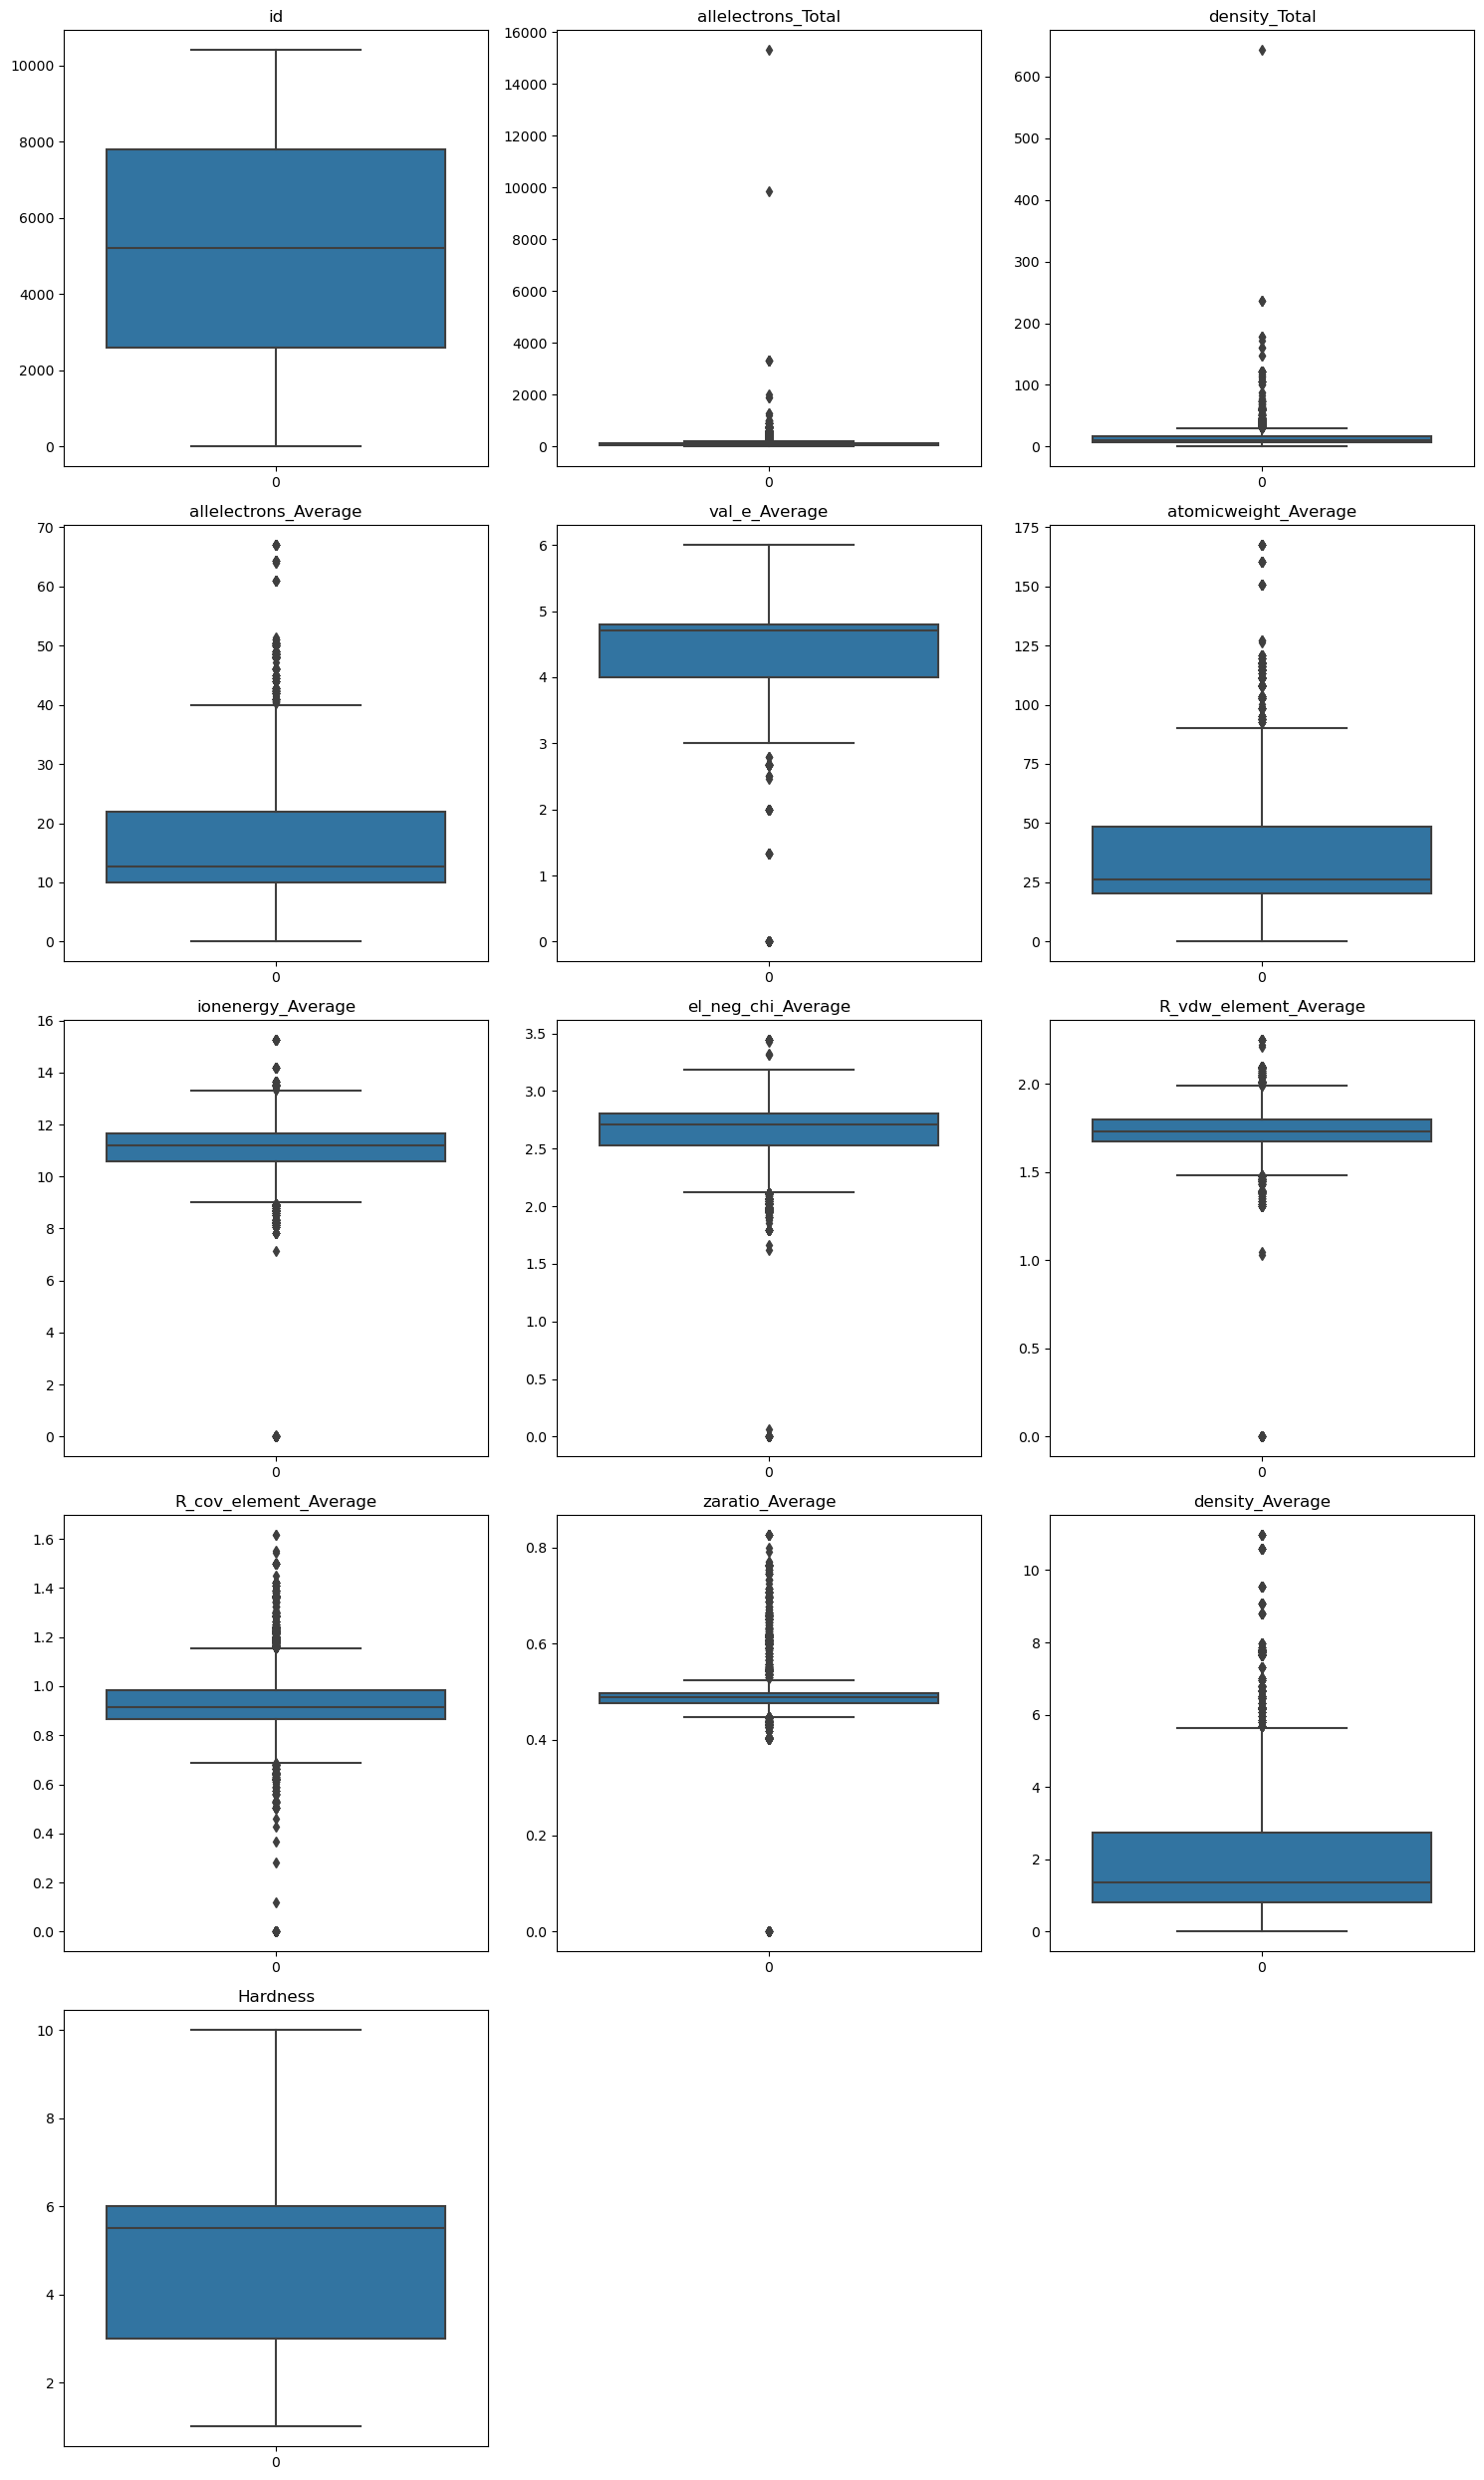

In [13]:
num_columns = len(data.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()
    

In [15]:

def remove_outliers(data):
    numeric_columns = data.select_dtypes(include='number')
    cleaned_data = data.copy()

    for column in numeric_columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

    return cleaned_data

    

In [16]:
data2=remove_outliers(data)

In [17]:
data2.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.08810,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.04083,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.94850,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.82448,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
5,5,131.0,24.529328,21.833333,4.666667,50.131500,11.94820,2.858333,1.758333,0.896667,0.466388,2.94712,6.0


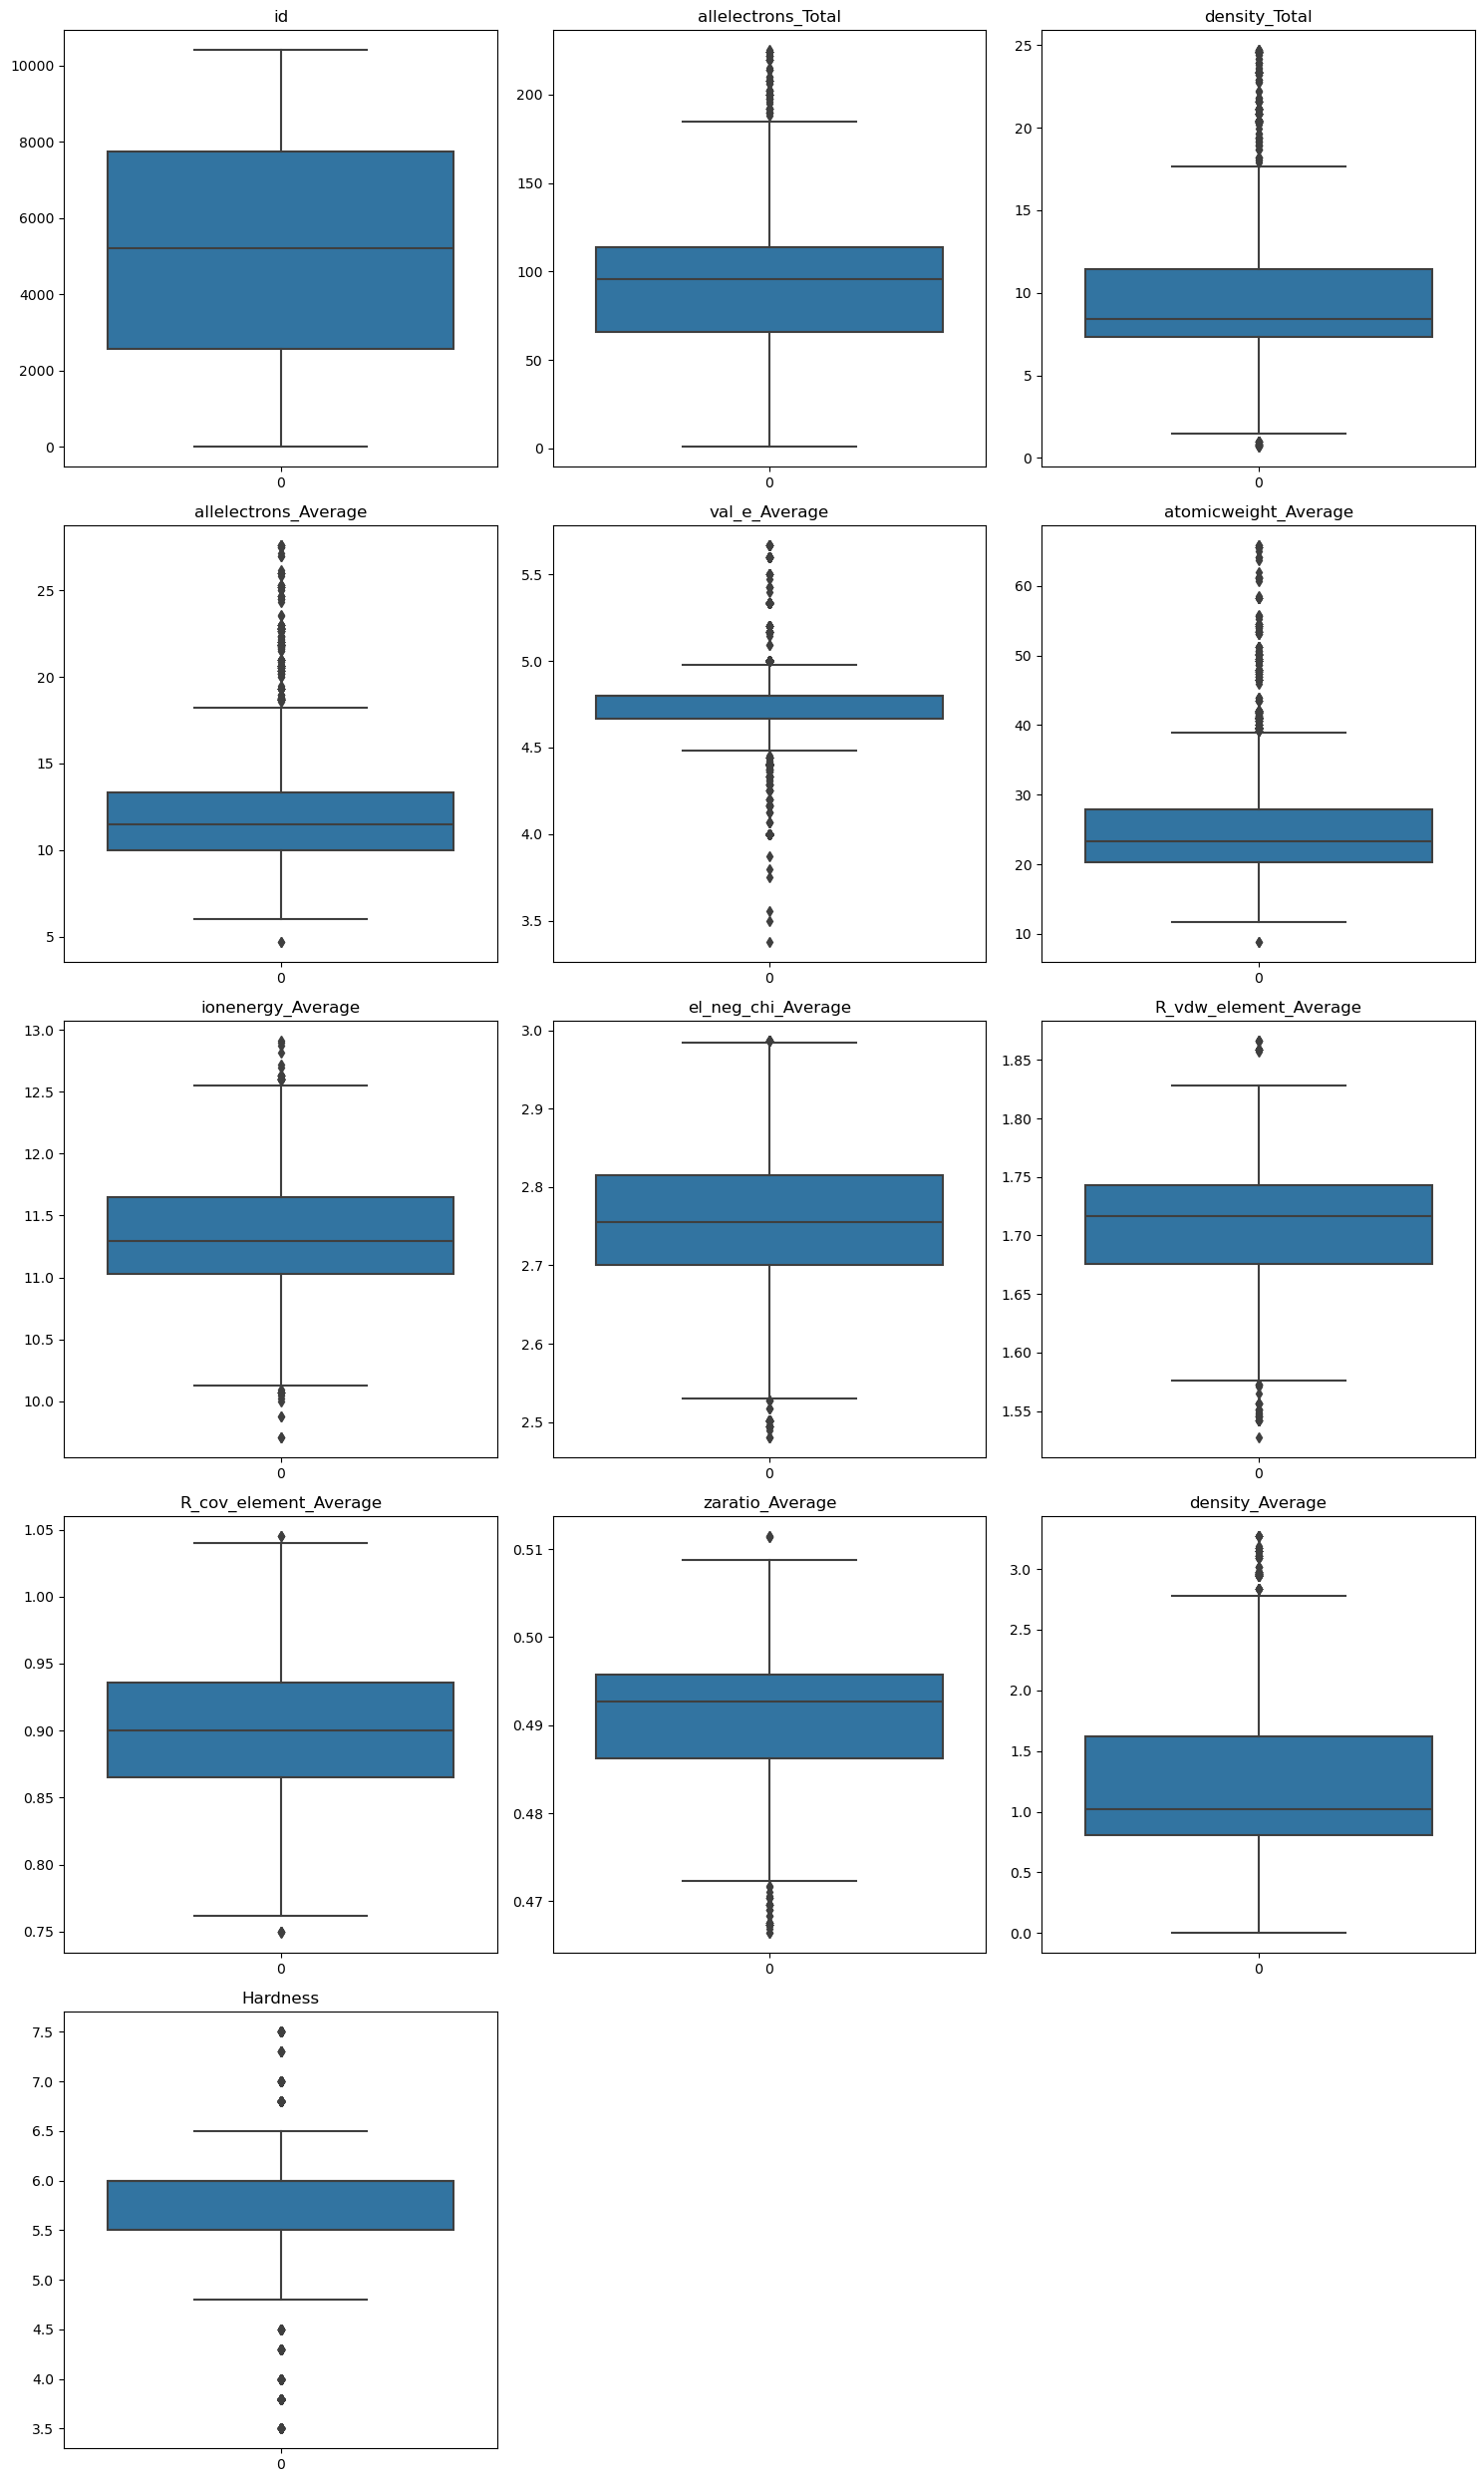

In [18]:
num_columns = len(data2.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(data2.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data2[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [19]:
def remove_outliers(data):
    numeric_columns = data.select_dtypes(include='number')
    cleaned_data = data.copy()

    for column in numeric_columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

    return cleaned_data

    

In [20]:
data3=remove_outliers(data2)

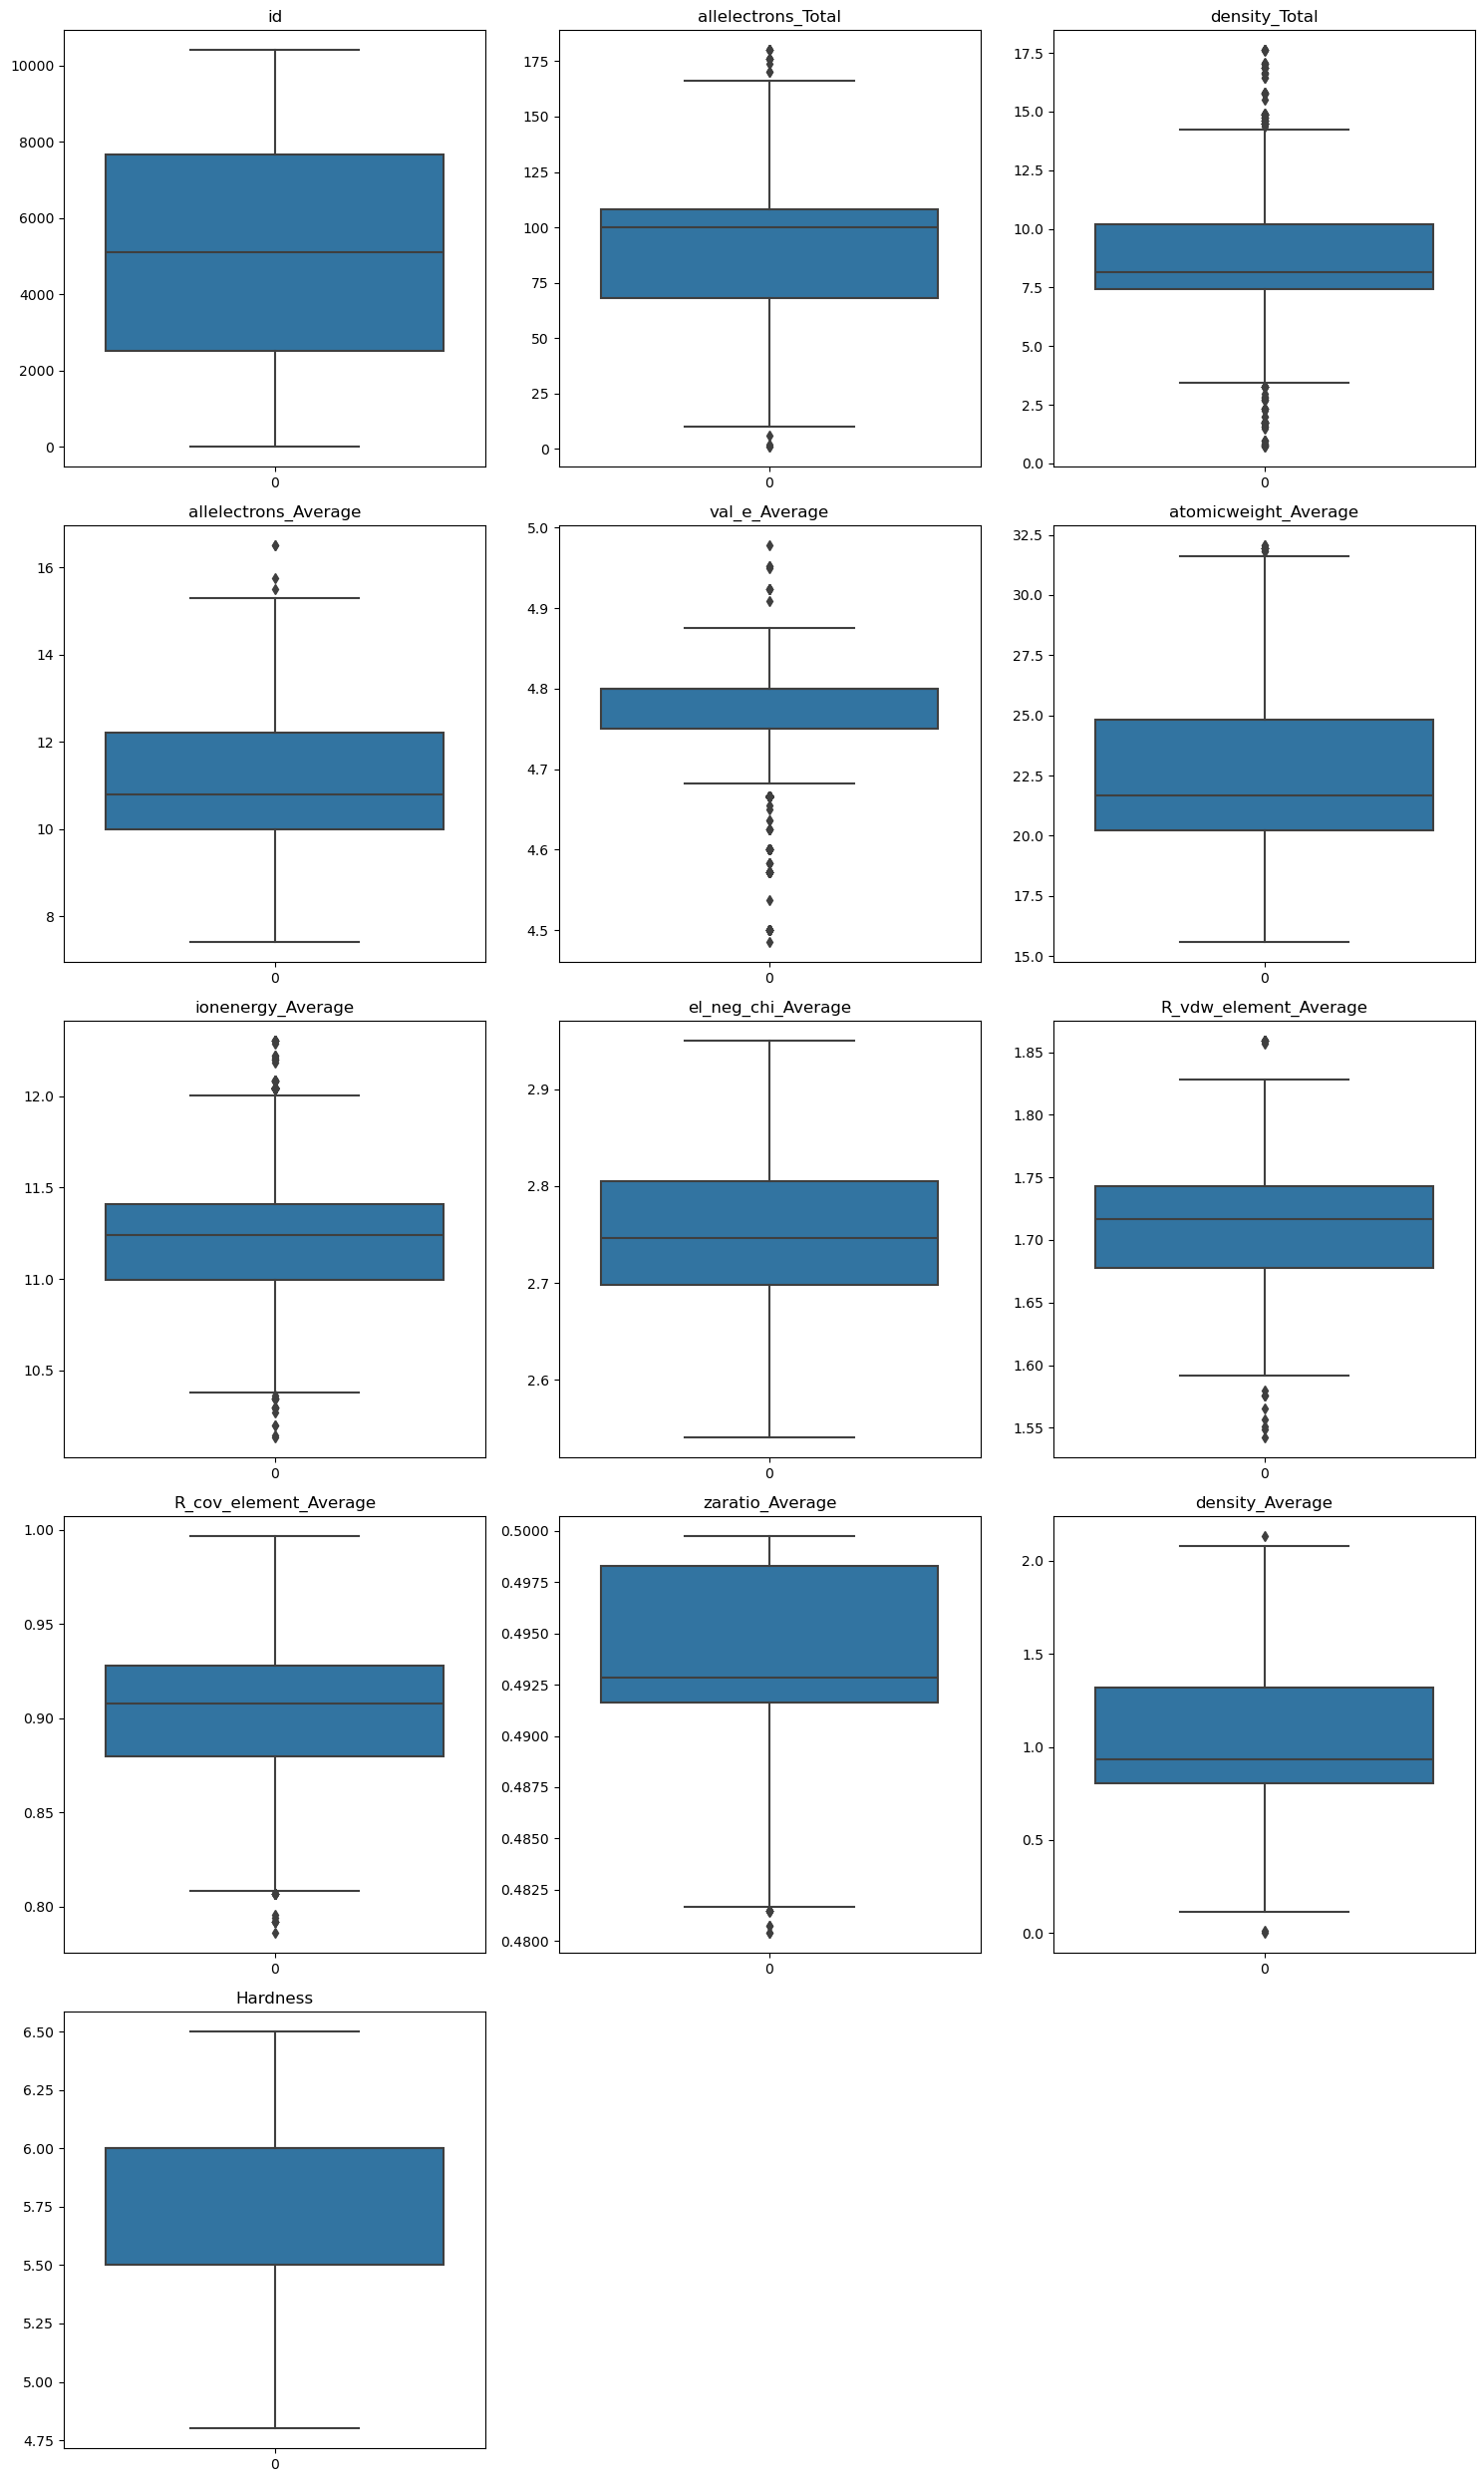

In [21]:
num_columns = len(data3.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(data3.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data3[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [22]:
data3.drop(columns=['id'],inplace=True)

In [23]:
data3.columns

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
X=data3.drop('Hardness',axis=1)
y=data3['Hardness']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

y_pred_rf = rf_reg.predict(X_test_scaled)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R^2 Score:", r2_score(y_test, y_pred_lin))

print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))

Linear Regression:
Mean Squared Error: 0.1512367615120526
R^2 Score: -0.006990128606626955

Random Forest Regression:
Mean Squared Error: 0.14697366376811594
R^2 Score: 0.021395148243454898


In [ ]:
X=data.drop('Hardness',axis=1)
y=data['Hardness']

In [35]:
data.drop(columns=['id'],inplace=True)

In [36]:
data.columns

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [39]:
X2=data.drop('Hardness',axis=1)
y2=data['Hardness']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

y_pred_rf = rf_reg.predict(X_test_scaled)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R^2 Score:", r2_score(y_test, y_pred_lin))

print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))

Linear Regression:
Mean Squared Error: 2.1054937814488897
R^2 Score: 0.22537237659929943

Random Forest Regression:
Mean Squared Error: 1.546419137621411
R^2 Score: 0.4310603090298829
